Gradient Descent converged in 10000 iterations.


/tmp/ipykernel_2161370/3290655845.py:10: RuntimeWarning: overflow encountered in scalar power
  dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
/tmp/ipykernel_2161370/3290655845.py:11: RuntimeWarning: overflow encountered in scalar power
  dfdy = 200 * (y - x**2)
/tmp/ipykernel_2161370/3290655845.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
/tmp/ipykernel_2161370/3290655845.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy = 200 * (y - x**2)


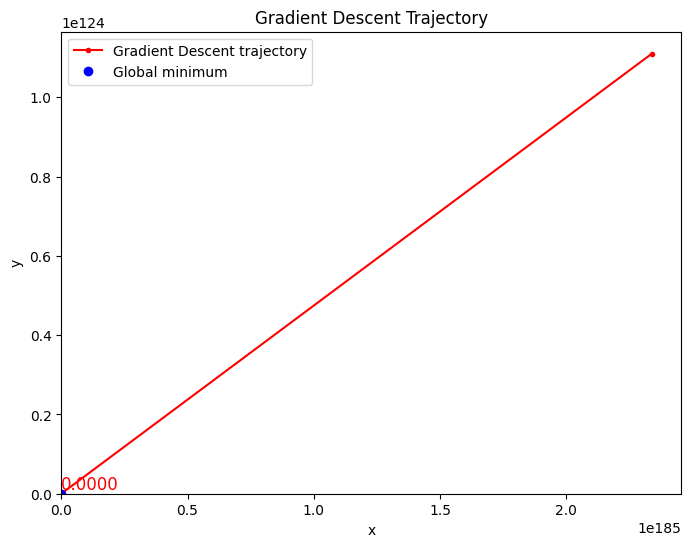

Newton's Method converged in 7 iterations.


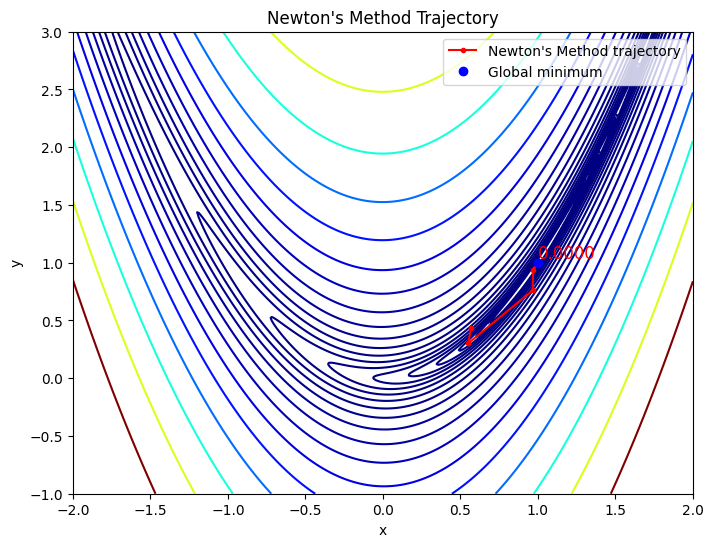

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradient of the Rosenbrock function
def gradient(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

# Hessian of the Rosenbrock function
def hessian(x, y):
    d2fdx2 = 2 - 400 * y + 1200 * x**2
    d2fdy2 = 200
    d2fdxdy = -400 * x
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient descent method
def gradient_descent(starting_point, learning_rate, tol=1e-6, max_iter=10000):
    x, y = starting_point
    trajectory = [(x, y)]
    for i in range(max_iter):
        grad = gradient(x, y)
        if np.linalg.norm(grad) < tol:
            break
        x, y = x - learning_rate * grad[0], y - learning_rate * grad[1]
        trajectory.append((x, y))
    return np.array(trajectory), i + 1

# Newton's method
def newtons_method(starting_point, tol=1e-6, max_iter=10000):
    x, y = starting_point
    trajectory = [(x, y)]
    for i in range(max_iter):
        grad = gradient(x, y)
        if np.linalg.norm(grad) < tol:
            break
        hess = hessian(x, y)
        step = np.linalg.solve(hess, grad)
        x, y = x - step[0], y - step[1]
        trajectory.append((x, y))
    return np.array(trajectory), i + 1

# Plotting function
def plot_trajectory(trajectory, method_name):
    plt.figure(figsize=(8, 6))
    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
    Z = rosenbrock(X, Y)
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', label=f'{method_name} trajectory')
    plt.plot(1, 1, 'bo', label='Global minimum')
    plt.text(1, 1, f'{rosenbrock(1,1):.4f}', fontsize=12, color='red', 
         horizontalalignment='left', verticalalignment='bottom')
    
    plt.title(f'{method_name} Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Starting point
starting_point = np.random.rand(2)

trajectory_gd, iter_gd = gradient_descent(starting_point, learning_rate=0.001)
print(f"Gradient Descent converged in {iter_gd} iterations.")
plot_trajectory(trajectory_gd, "Gradient Descent")

trajectory_nm, iter_nm = newtons_method(starting_point)
print(f"Newton's Method converged in {iter_nm} iterations.")
plot_trajectory(trajectory_nm, "Newton's Method")


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradient of the Rosenbrock function
def gradient(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

# Hessian of the Rosenbrock function
def hessian(x, y):
    d2fdx2 = 2 - 400 * y + 1200 * x**2
    d2fdy2 = 200
    d2fdxdy = -400 * x
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient descent method
def gradient_descent(starting_point, learning_rate, tol=1e-6, max_iter=10000):
    x, y = starting_point
    trajectory = [(x, y)]
    f_values = [rosenbrock(x, y)]
    for i in range(max_iter):
        grad = gradient(x, y)
        if np.linalg.norm(grad) < tol:
            break
        x, y = x - learning_rate * grad[0], y - learning_rate * grad[1]
        trajectory.append((x, y))
        f_values.append(rosenbrock(x, y))
    return np.array(trajectory), f_values, i + 1

# Newton's method
def newtons_method(starting_point, tol=1e-6, max_iter=10000):
    x, y = starting_point
    trajectory = [(x, y)]
    f_values = [rosenbrock(x, y)]
    for i in range(max_iter):
        grad = gradient(x, y)
        if np.linalg.norm(grad) < tol:
            break
        hess = hessian(x, y)
        step = np.linalg.solve(hess, grad)
        x, y = x - step[0], y - step[1]
        trajectory.append((x, y))
        f_values.append(rosenbrock(x, y))
    return np.array(trajectory), f_values, i + 1

# Plotting function value vs. iterations
def plot_function_values(f_values_gd, f_values_nm):
    plt.figure(figsize=(10, 6))
    plt.semilogy(f_values_gd, label='Gradient Descent')
    plt.semilogy(f_values_nm, label="Newton's Method")
    plt.title('Function Value vs. Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Rosenbrock Function Value (log scale)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Starting point
np.random.seed(0)  # For reproducibility
starting_point = np.random.rand(2)

# Part (a) Gradient Descent with η = 0.001
trajectory_gd, f_values_gd, iter_gd = gradient_descent(starting_point, learning_rate=0.001)
print(f"Gradient Descent converged in {iter_gd} iterations.")
plot_trajectory(trajectory_gd, "Gradient Descent")

# Part (b) Newton's Method
trajectory_nm, f_values_nm, iter_nm = newtons_method(starting_point)
print(f"Newton's Method converged in {iter_nm} iterations.")
plot_trajectory(trajectory_nm, "Newton's Method")

# Plotting the function value as global minimum is approached
plot_function_values(f_values_gd, f_values_nm)


Gradient Descent converged in 10000 iterations.


NameError: name 'plot_trajectory' is not defined